## Introduction to [``anydyce``](https://posita.github.io/anydyce/)’s interactive visualization capabilities

Selected examples highlighting [``dyce``](https://posita.github.io/dyce/)’s use and capabilities. Select ``Run All Cells`` from the ``Run`` menu above.

## AnyDice replacement

``anydyce`` affords functionality similar to [AnyDice](https://anydice.com/) within [Jupyter](https://jupyter.org/) via its ``anydyce.jupyter_visualize`` interface.

### Interactive example: highest, middle, and lowest of 3d6

In [1]:
# Install additional requirements if necessary
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    try:
        import anydyce
    except (ImportError, ModuleNotFoundError):
        requirements = ["anydyce~=0.4.0"]
        try:
            import piplite ; await piplite.install(requirements)
            # Work around <https://github.com/jupyterlite/jupyterlite/issues/838>
            import matplotlib.pyplot ; matplotlib.pyplot.clf()
        except ImportError:
            import pip ; pip.main(["install"] + requirements)
    import anydyce

In [2]:
from anydyce import jupyter_visualize
from dyce import P

p_3d6 = 3@P(6)
jupyter_visualize(
    (
        p_3d6.h(-1),  # highest
        p_3d6.h(1),  # middle
        p_3d6.h(0),  # lowest
    ),
    initial_markers="o",
    selected_name="Line Plot",
)

### Interactive example: Powered by the *Apocalypse* (PbtA)

Expected distributions from *[Apocalypse World](http://apocalypse-world.com/)’s* core mechanic with various modifiers.

In [3]:
from anydyce import jupyter_visualize
from dyce import H
from dyce.evaluation import HResult, foreach
from enum import IntEnum, auto

class PBTA(IntEnum):
    FAIL = 0
    COST = auto()
    SUCC = auto()

def pbta(result: HResult):
    if result.outcome <= 6:
        return PBTA.FAIL
    elif result.outcome >= 10:
        return PBTA.SUCC
    else:
        return PBTA.COST

jupyter_visualize(
    (
        (f"PBTA {mod:+}", foreach(pbta, result=(2@H(6)) + mod), ((2@H(6)) + mod))
        for mod in range(-1, 4)
    ),
    initial_burst_cmap_link=False,
    initial_burst_cmap_outer="Greys",
)

## Lower level visualization conveniences

For more detailed control over output, ``anydyce`` exposes additional visualization conveniences.

### Visualization example: 2d10 vs. d8+d12, bar, line, and burst charts

Comparing two mechanics with similar distributions via ``anydyce``’s take on a bar chart (``anydyce.viz.plot_bar``), a line chart (``anydyce.viz.plot_line``), and a “burst” chart (``anydyce.viz.plot_burst`` which is ``anydyce``’s take on a donut chart).

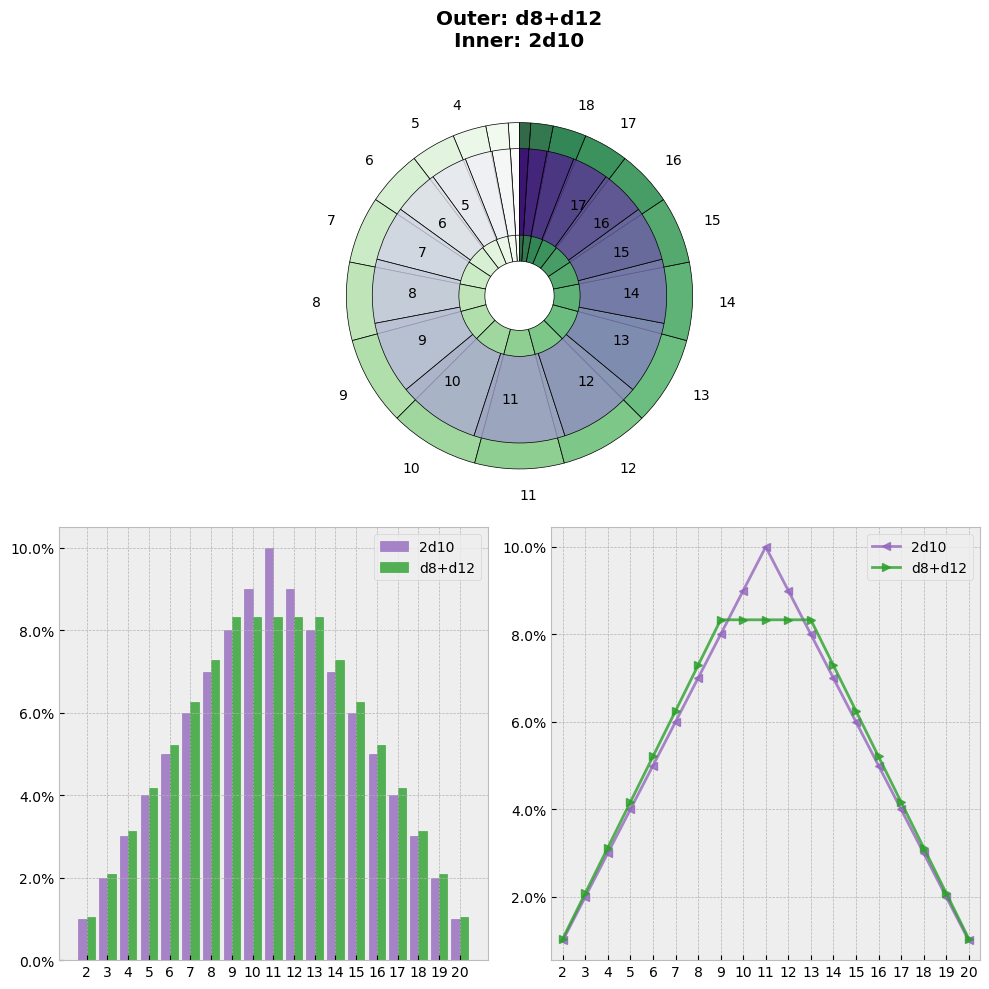

In [4]:
from anydyce.viz import plot_bar, plot_burst, plot_line
from dyce import H
import matplotlib.pyplot
import matplotlib.style

matplotlib.style.use("bmh")
matplotlib.pyplot.rcParams["figure.figsize"] = (10, 10)

d10_2 = 2@H(10)
d10_2_label = "2d10"
d8d12 = H(8) + H(12)
d8d12_label = "d8+d12"

# Burst chart
ax = matplotlib.pyplot.subplot2grid((2, 2), (0, 0), colspan=2)
plot_burst(
    ax,
    h_inner=d10_2,
    h_outer=d8d12,
    inner_cmap="Purples_r",
    outer_cmap="Greens_r",
    alpha=0.8,
    title=f"Outer: {d8d12_label}\nInner: {d10_2_label}",
)

# Bar chart
ax = matplotlib.pyplot.subplot2grid((2, 2), (1, 0))
plot_bar(ax, [
    (d10_2_label, d10_2),
    (d8d12_label, d8d12),
], alpha=0.8)
# Re-color the bars
so_far = 0
for count, color in zip(
    (len(h) for h in (d10_2, d8d12)),
    ("tab:purple", "tab:green"),
):
    for i in range(count):
        ax.patches[i + so_far].set_color(color)
    so_far += count
ax.legend()

# Line chart
ax = matplotlib.pyplot.subplot2grid((2, 2), (1, 1))
plot_line(ax, [
    (d10_2_label, d10_2),
    (d8d12_label, d8d12),
], markers="<>", alpha=0.8)
# Re-color the lines
ax.lines[0].set_color("tab:purple")
ax.lines[1].set_color("tab:green")
ax.legend()

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()